In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
data=pd.read_csv("D:\jupyter\diabetes.csv")
#讓data讀進來

In [19]:
data["Outcome"].value_counts()
#計算結果的True和False，發現比例為2:1，推測

0    500
1    268
Name: Outcome, dtype: int64

In [20]:
data.dtypes
#沒有因為數字，但以objects的型態儲存的情形

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

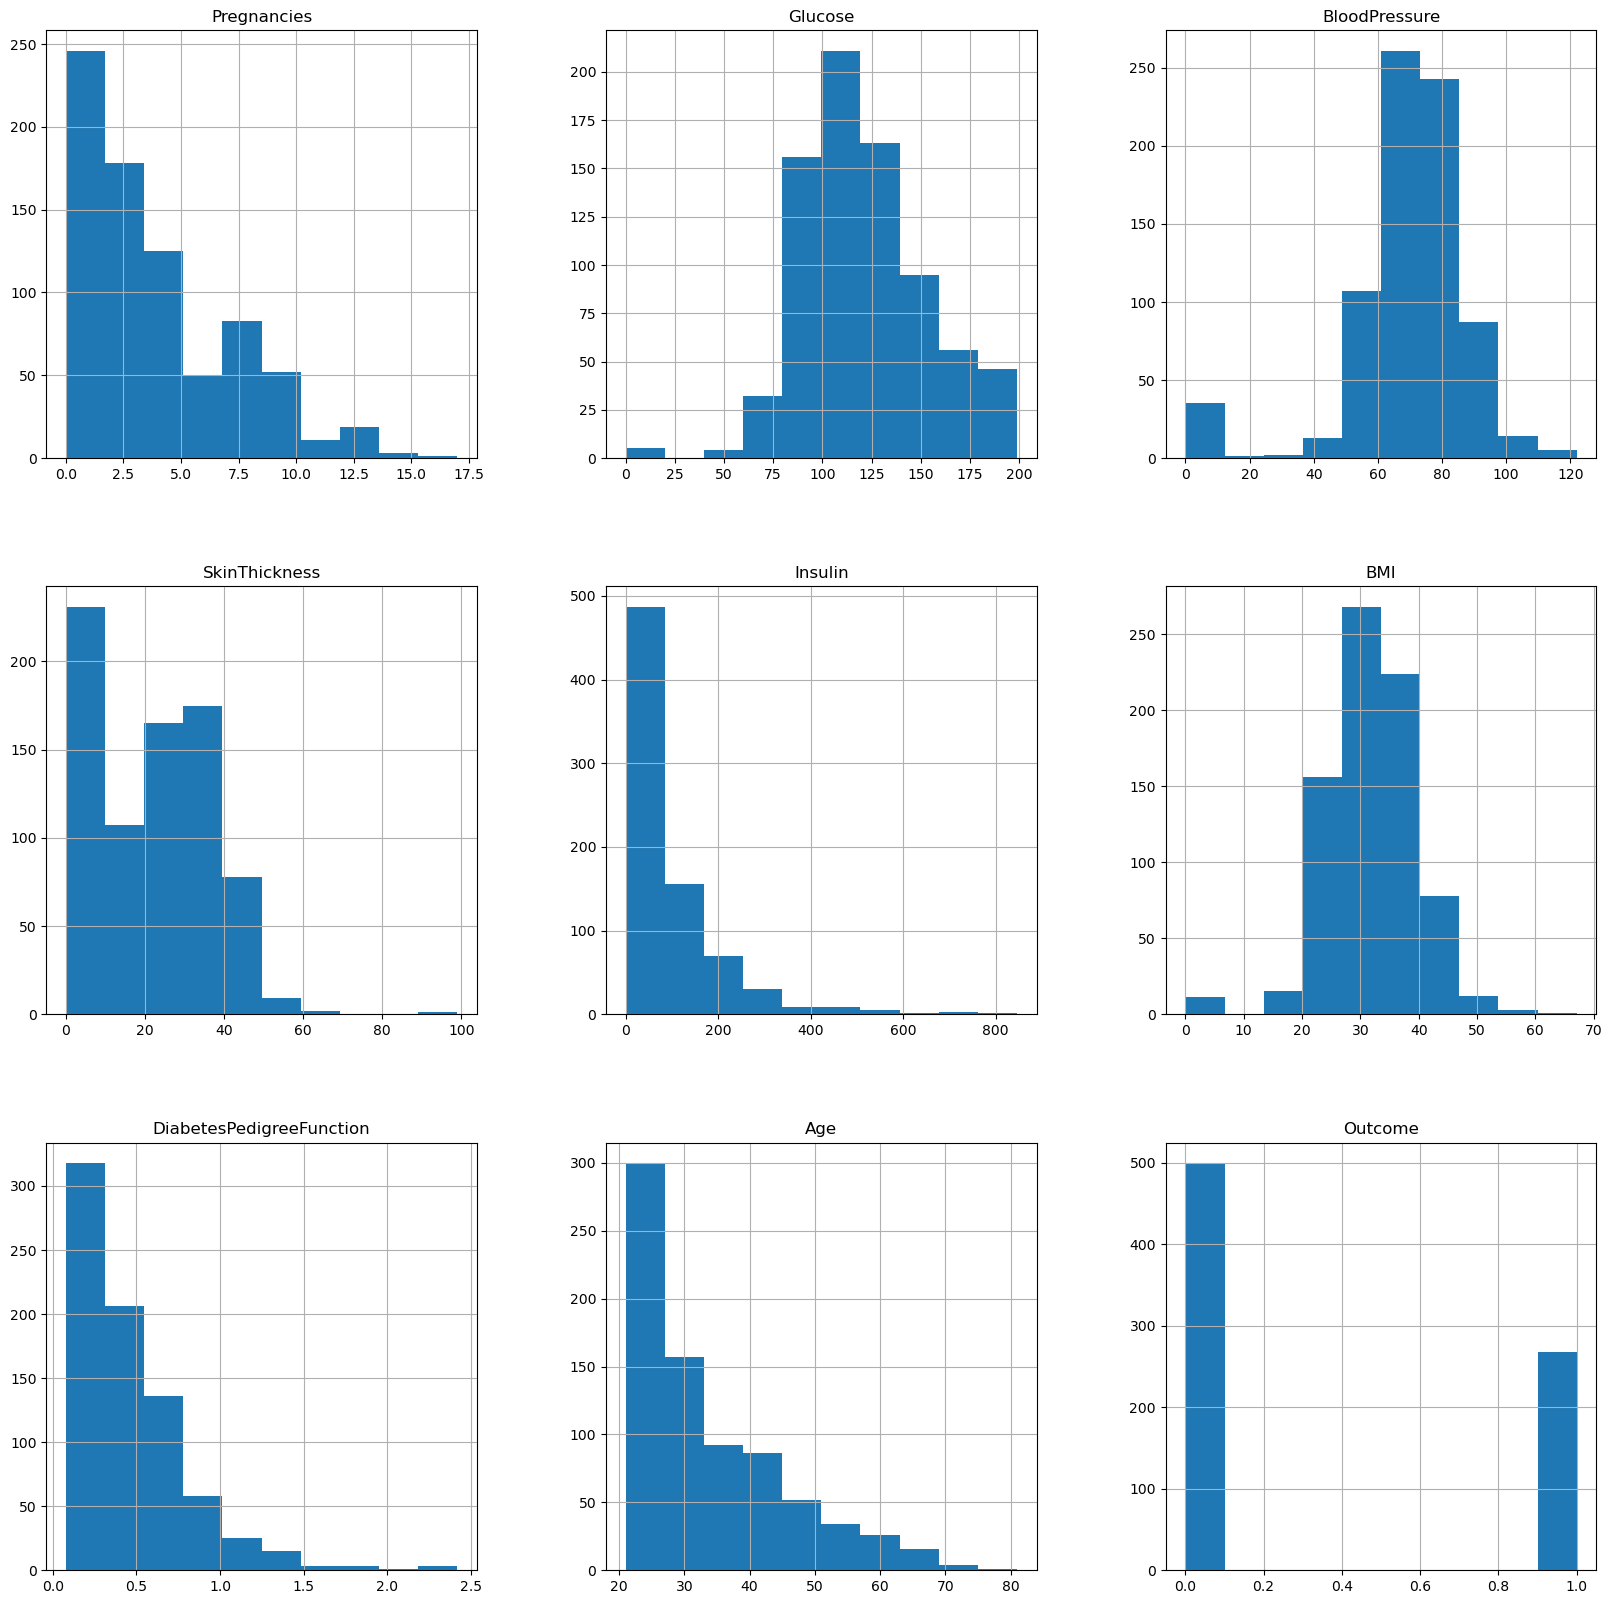

In [21]:
data1 = data.hist(figsize = (20,20))
#需要處理data，先印處理前的圖

In [22]:
data = data.copy(deep = True)
data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)
#先將會影響數據真實性的0值轉成NaN值

In [23]:
data['Glucose'].fillna(data['Glucose'].median(), inplace = True)
data['BloodPressure'].fillna(data['BloodPressure'].median(), inplace = True)
data['SkinThickness'].fillna(data['SkinThickness'].median(), inplace = True)
data['Insulin'].fillna(data['Insulin'].median(), inplace = True)
data['BMI'].fillna(data['BMI'].median(), inplace = True)
#以data的中位數來代替，預測完發現比平均與delete好

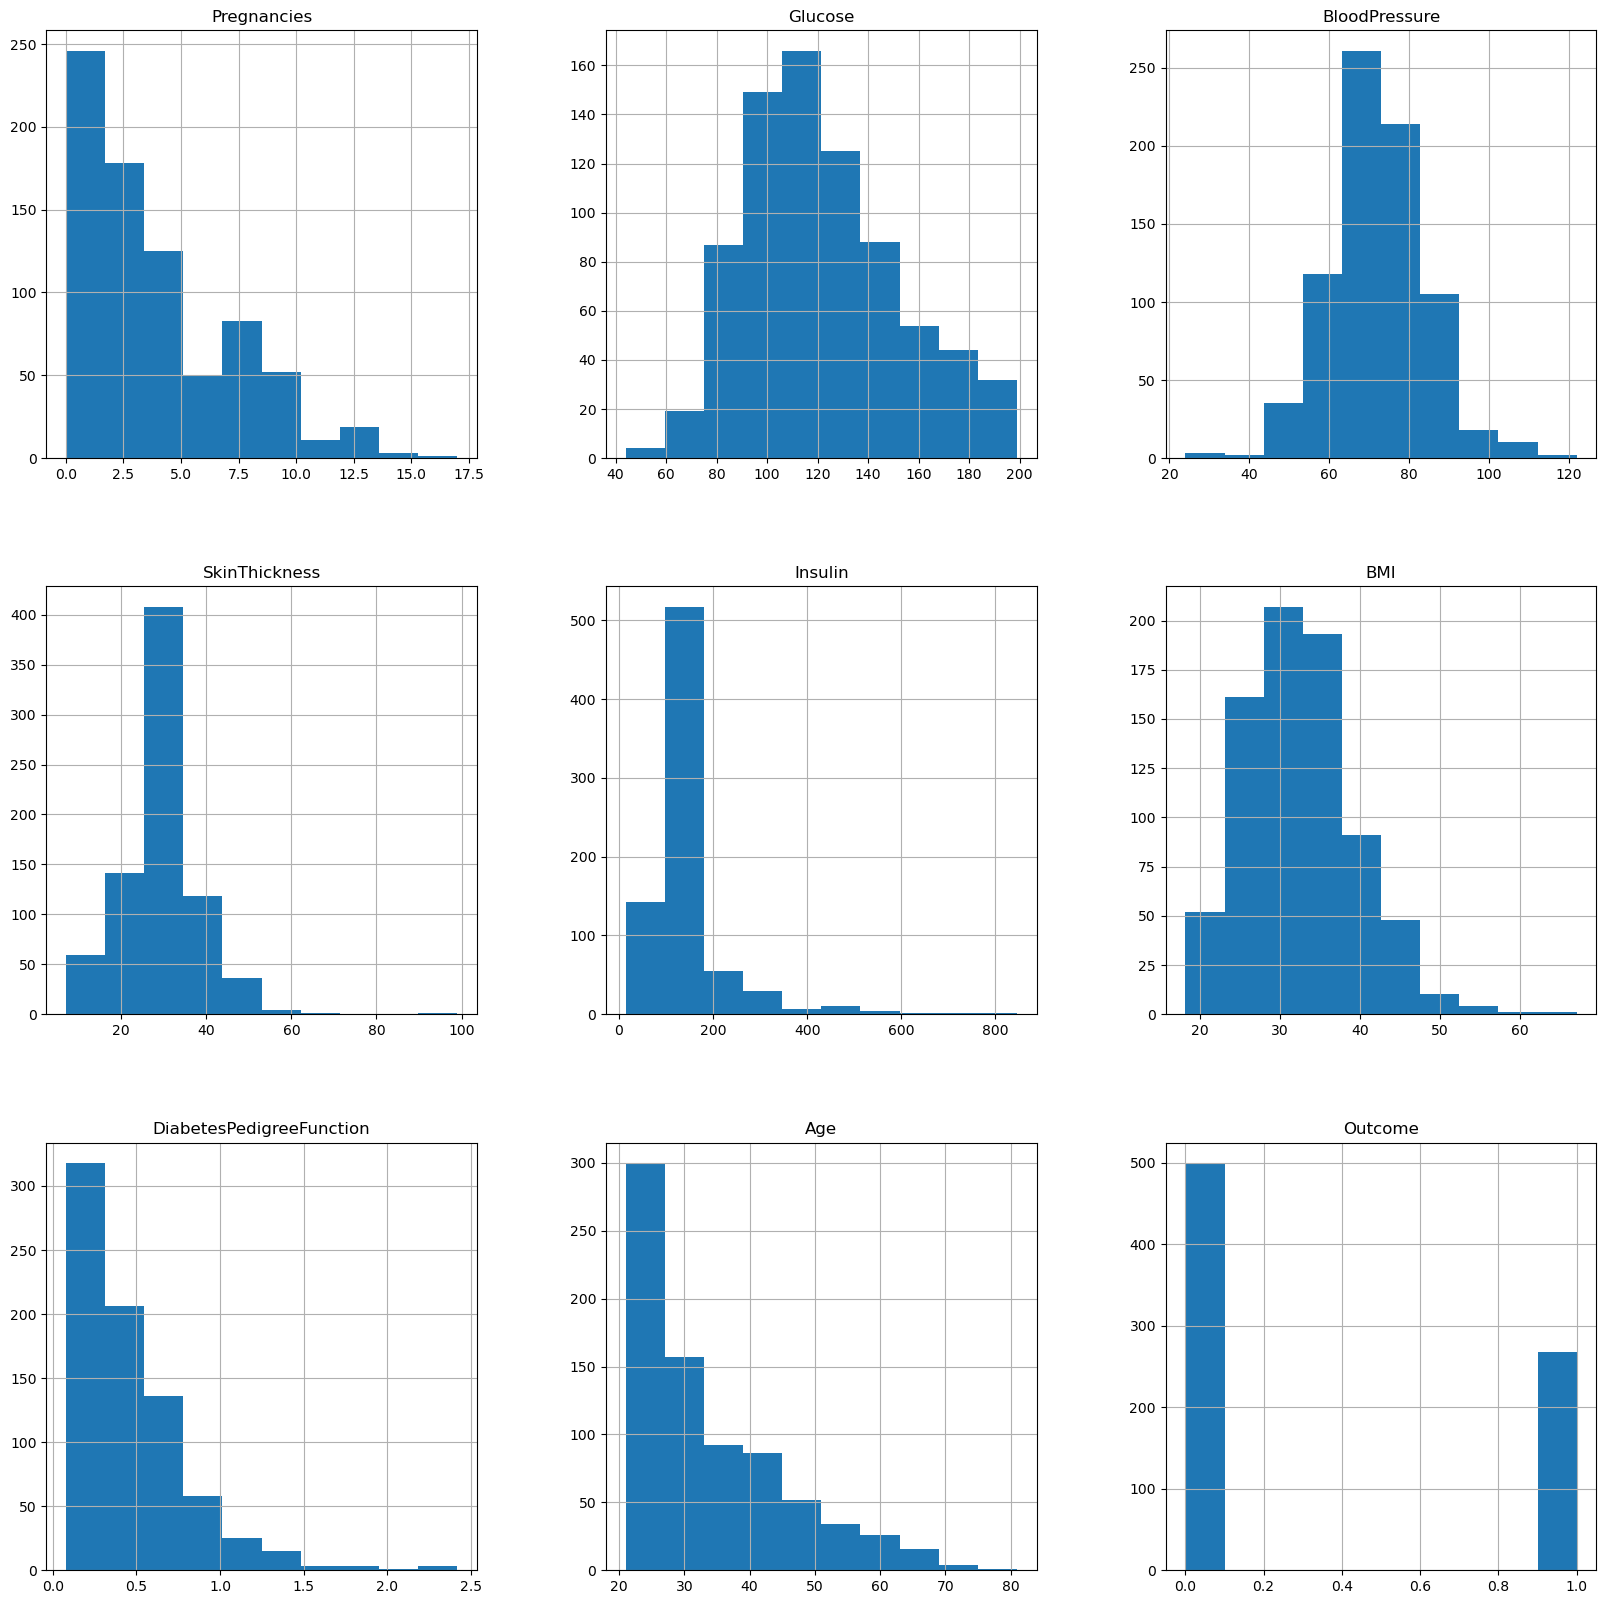

In [24]:
data2 = data.hist(figsize = (20,20))
#處理空值後的data，可以發現'Glucose''BloodPressure''SkinThickness''Insulin''BMI'的空值被我們處理了

In [25]:
clear_data = data.drop(['Outcome'],axis = 1)
label = data['Outcome']
clear_data[:]
#移除預測的目標
#預測的目標命名label

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63
764,2,122.0,70.0,27.0,125.0,36.8,0.340,27
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30
766,1,126.0,60.0,29.0,125.0,30.1,0.349,47


In [26]:
x_features = clear_data.iloc[:,:-1] #要訓練的特徵
y_label = data.iloc[:,-1] #正確答案
y_label

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [27]:
from sklearn.model_selection import KFold #交叉驗證選擇KFold
kf = KFold(n_splits = 5, shuffle = True, random_state = 42)
from sklearn.linear_model import LogisticRegression #model
model = LogisticRegression(max_iter = 250) #設定最大迭代次數
#有試著使用leave one out的驗證法，但推測因為0與1的比例太偏，導致Var的值為0

In [29]:
test_bias = []
test_variances = []
train_errors  = []
test_errors = []
#做好list

for train_index, test_index in kf.split(x_features):
#kf.split分五份出來      
    
    X_train, y_train = x_features.iloc[train_index], y_label[train_index]
    X_test, y_test = x_features.iloc[test_index], y_label[test_index]
    #訓練集和測試集
    
    model.fit(X_train, y_train)
    #訓練model
    
    
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    #預測訓練與測試的data

    
    bias = np.mean((y_test_pred - np.mean(y_test)) ** 2)
    #計算平均(預測測試集的資料-X測試集的正確答案取平均)的平方
    variance = np.var(y_test_pred)
    

    test_bias.append(bias)
    test_variances.append(variance)
    #把結果加到我們預先做好的list

    
    train_error = np.sum((y_train_pred - y_train) ** 2) / len(y_train_pred)
    test_error = np.sum((y_test_pred - y_test) ** 2) / len(y_test_pred)
    #計算訓練與測試的誤差
    
    train_errors.append(train_error)
    test_errors.append(test_error)
    #把結果加到我們預先做好的list
    

print("Bias",sum(test_bias) / len(test_bias))
print("Variance", sum(test_variances) / len(test_variances))
print("平均訓練誤差", sum(train_errors) / len(train_errors))
print("平均測試誤差", sum(test_errors) / len(test_errors))  
#輸出結果
    

Bias 0.20356418733791073
Variance 0.1949367135896293
平均訓練誤差 0.22981594767087735
平均測試誤差 0.23043884220354807
